In [1]:
!pip install git+https://github.com/ylg619/yogAssist.git

  Cloning https://github.com/ylg619/yogAssist.git to /tmp/pip-req-build-ox4b45bt
  Running command git clone -q https://github.com/ylg619/yogAssist.git /tmp/pip-req-build-ox4b45bt
  Created wheel for yogAssit: filename=yogAssit-1.0-cp37-none-any.whl size=17803 sha256=a4f35258e1fdaa17af0f02e8a1862d433007ca82d9fc35a0c471c2a3c72d0bce
  Stored in directory: /tmp/pip-ephem-wheel-cache-hh56yu61/wheels/71/15/d1/263b25d47e80a22c4084b4f3032ba967e165d49f0b5441608a
Successfully built yogAssit


In [20]:
import yogAssist
import yogAssist.post as post
from yogAssist.model_wrapper import ModelWrapper

In [4]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True )

Mounted at /content/drive


In [5]:
cd drive/MyDrive/raw_data/

/content/drive/MyDrive/raw_data


In [6]:
ls

bonus/                images_labels.txt    missing_kaggle_to_yoga82.gdoc
capucine/             images-yogajournal/  missing_kaggle_to_yoga82.txt
csv/                  kaggle_44-0.png      model11_test-15Sun1219-2101/
dataset/              kaggle_80-0.png      model11_train-15Sun1219-2059/
DenseNet_model_data/  kaggle.json          success.csv
failure.csv           kaggle-yoga-pose/    yoga_dataset_links/
images/               keypoints_stat.txt   yoga_journal_links/


In [7]:
model = ModelWrapper('./model11_test-15Sun1219-2101')

In [8]:
ki = 'images'
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

### 1. Using ImageGenerator

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

test_set = test_gen.flow_from_directory(f'{BASE_PATH}',
                                          target_size=(368,368),
                                          batch_size=32,
                                          class_mode='categorical',shuffle=False)

Found 23973 images belonging to 82 classes.


In [ ]:
with open('images_labels.txt','a') as f:
    f.writelines(test_set.filenames)


In [ ]:
pafs, kps = model.model.predict(test_set)

In [ ]:
skeletonizer = post.Skeletonizer(kps[0], pafs[0])

In [ ]:
skeletons = skeletonizer.create_skeletons()

In [ ]:
test_set.filenames

["Bharadvaja's_Twist_pose_or_Bharadvajasana_I_/yogajournal_78.jpg",
 'Boat_Pose_or_Paripurna_Navasana_/yogajournal_77.jpg',
 'Bound_Angle_Pose_or_Baddha_Konasana_/yogajournal_104.jpg',
 'Bow_Pose_or_Dhanurasana_/yogajournal_142.jpg',
 'Camel_Pose_or_Ustrasana_/yogajournal_141.jpg',
 'Cat_Cow_Pose_or_Marjaryasana_/yogajournal_75.jpg',
 'Chair_Pose_or_Utkatasana_/yogajournal_63.jpg',
 'Child_Pose_or_Balasana_/yogajournal_103.jpg',
 'Cobra_Pose_or_Bhujangasana_/yogajournal_140.jpg',
 'Crane_(Crow)_Pose_or_Bakasana_/yogajournal_167.jpg',
 'Dolphin_Plank_Pose_or_Makara_Adho_Mukha_Svanasana_/yogajournal_127.jpg',
 'Dolphin_Pose_or_Ardha_Pincha_Mayurasana_/yogajournal_62.jpg',
 'Eagle_Pose_or_Garudasana_/yogajournal_61.jpg',
 'Extended_Puppy_Pose_or_Uttana_Shishosana_/yogajournal_115.jpg',
 'Extended_Revolved_Side_Angle_Pose_or_Utthita_Parsvakonasana_/yogajournal_59.jpg',
 'Extended_Revolved_Triangle_Pose_or_Utthita_Trikonasana_/yogajournal_30.jpg',
 'Feathered_Peacock_Pose_or_Pincha_Mayurasa

In [ ]:
for i in range(kps.shape[0]):
  skeletonizer = post.Skeletonizer(kps[i], pafs[i])
  skeletons = skeletonizer.create_skeletons()
  for skeleton in skeletons:
    print(test_set.filenames[i],len(skeleton.keypoints))

Bharadvaja's_Twist_pose_or_Bharadvajasana_I_/yogajournal_78.jpg 10
Boat_Pose_or_Paripurna_Navasana_/yogajournal_77.jpg 6
Bound_Angle_Pose_or_Baddha_Konasana_/yogajournal_104.jpg 14
Bow_Pose_or_Dhanurasana_/yogajournal_142.jpg 3
Bow_Pose_or_Dhanurasana_/yogajournal_142.jpg 2
Bow_Pose_or_Dhanurasana_/yogajournal_142.jpg 3
Camel_Pose_or_Ustrasana_/yogajournal_141.jpg 3
Camel_Pose_or_Ustrasana_/yogajournal_141.jpg 3
Cat_Cow_Pose_or_Marjaryasana_/yogajournal_75.jpg 2
Cat_Cow_Pose_or_Marjaryasana_/yogajournal_75.jpg 2
Chair_Pose_or_Utkatasana_/yogajournal_63.jpg 6
Chair_Pose_or_Utkatasana_/yogajournal_63.jpg 3
Chair_Pose_or_Utkatasana_/yogajournal_63.jpg 2
Child_Pose_or_Balasana_/yogajournal_103.jpg 7
Cobra_Pose_or_Bhujangasana_/yogajournal_140.jpg 9
Crane_(Crow)_Pose_or_Bakasana_/yogajournal_167.jpg 2
Crane_(Crow)_Pose_or_Bakasana_/yogajournal_167.jpg 2
Dolphin_Plank_Pose_or_Makara_Adho_Mukha_Svanasana_/yogajournal_127.jpg 4
Dolphin_Plank_Pose_or_Makara_Adho_Mukha_Svanasana_/yogajournal_127

In [ ]:
import yogAssist.visualizations as vis
from PIL import Image

In [ ]:
import numpy as np


In [ ]:
import configs.draw_config as draw_config

{'nose': (0.24444444444444444, 0.4888888888888889), 'sternum': (0.3333333333333333, 0.5111111111111111), 'Rshoulder': (0.3111111111111111, 0.4666666666666667), 'Relbow': (0.3111111111111111, 0.4), 'Rwrist': (0.3111111111111111, 0.3111111111111111), 'Rhip': (0.5555555555555556, 0.4666666666666667), 'Rknee': (0.6222222222222222, 0.37777777777777777), 'Rankle': (0.8222222222222222, 0.35555555555555557), 'Reye': (0.2222222222222222, 0.4888888888888889), 'Lshoulder': (0.3111111111111111, 0.5555555555555556), 'Lelbow': (0.3333333333333333, 0.6444444444444445), 'Lwrist': (0.3111111111111111, 0.7111111111111111), 'Lhip': (0.5555555555555556, 0.5333333333333333), 'Lknee': (0.6888888888888889, 0.6), 'Lankle': (0.8222222222222222, 0.6888888888888889), 'Leye': (0.2222222222222222, 0.4888888888888889), 'Lear': (0.24444444444444444, 0.5333333333333333)}


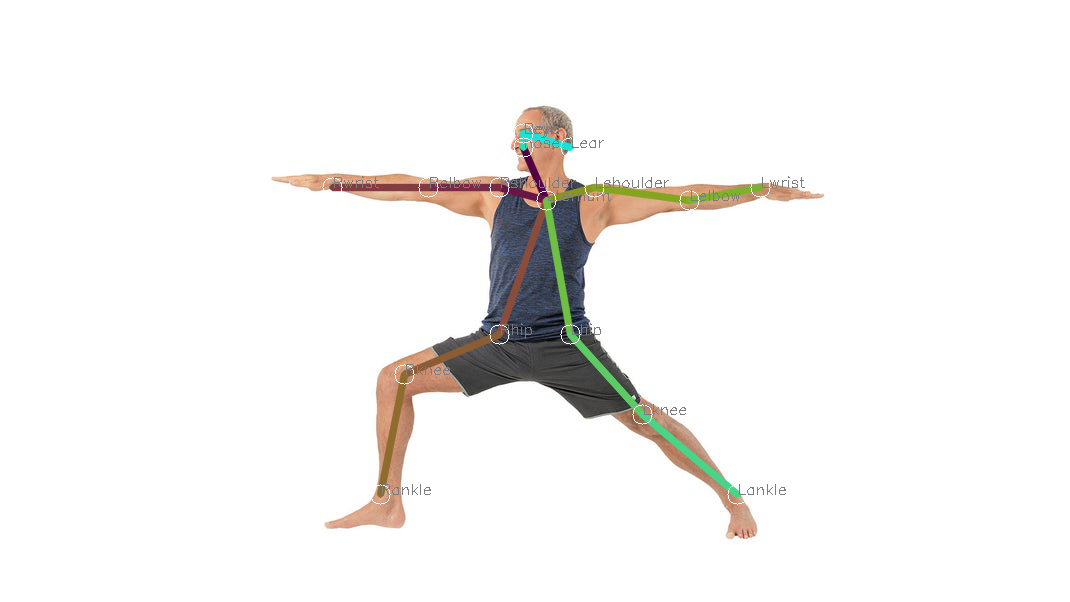

In [ ]:
img = Image.open('images-yogajournal/Warrior_II_Pose_or_Virabhadrasana_II_/yogajournal_45.jpg')

im = np.array(img.convert('RGB'))
skeleton_drawer = vis.SkeletonDrawer(im, draw_config)
skeletonizer = post.Skeletonizer(kps[50], pafs[50])
skeletons = skeletonizer.create_skeletons()
if len(skeletons) ==0:
    print('skeleton load failed')
else:
    
    for skeleton in skeletons:
        print(skeleton.keypoints)
        skeleton.draw_skeleton(skeleton_drawer.joint_draw,
                              skeleton_drawer.kpt_draw)
    im_tosave = Image.fromarray(im)
    
    im_tosave.show()

### 2. Using image_dataset_from_directry() and balancing with batching

In [9]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [10]:
import os
import sys
from os import listdir
from os.path import isfile, isdir, join, \
                    splitext, dirname, basename

In [11]:
total_list_of_files = []
dataset_root_path = "images"

classes = [f for f in listdir(dataset_root_path) if isdir(join(dataset_root_path, f))]

for class_ in classes:
  class_dir = dataset_root_path + "/" + class_
  tmp = [join(class_dir, f) for f in listdir(class_dir) if isfile(join(class_dir, f))]
  total_list_of_files += tmp

print(f"dataset(s) count: {len(total_list_of_files)} images")

dataset(s) count: 24063 images


In [15]:
dataset = image_dataset_from_directory('images',image_size=(368,368),batch_size=64,shuffle=False)
files_from_dataset = dataset.file_paths.copy()
#dataset = dataset.map( lambda x, y: (x/255, y))
labels=[]
preds=[]

# for batch_images, batch_labels in dataset:
#     batch_preds = self.model.predict(batch_images)
#     preds.append(batch_preds)
#     labels.append(batch_labels)


Found 24063 files belonging to 82 classes.


In [16]:
leftovers = [f for f in total_list_of_files if f not in files_from_dataset]
for l in leftovers:
  print (l)

In [18]:
from tqdm.notebook import tqdm

In [ ]:
l_nb_keypoints=[]
j = 0
for batch_images, batch_labels in tqdm(dataset):
    pafs, kps = model.model.predict(batch_images)
    l_nb_keypoints=[]
    for i in range(kps.shape[0]):
      skeletonizer = post.Skeletonizer(kps[i], pafs[i])
      skeletons = skeletonizer.create_skeletons()
      skl = [0] 
      for skeleton in skeletons:
        skl.append(len(skeleton.keypoints))
      
      l_nb_keypoints.append(f'{j},{max(skl)}\n')
      j+=1
    with open('keypoints_stat.txt','a') as f:
        f.writelines(l_nb_keypoints)


/usr/local/lib/python3.7/dist-packages/yogAssist/post.py:92: NumbaTypeSafetyWarning: unsafe cast from int64 to uint16. Precision may be lost.
  segmented_islands, island_hierarchy = mark_islands(truth_islands)  # segment and label the discontinuous regions, returns a island hierarchy dict.
/usr/local/lib/python3.7/dist-packages/yogAssist/post.py:96: NumbaTypeSafetyWarning: unsafe cast from int64 to float32. Precision may be lost.
  peaks, island_max = islands_max(heatmap, segmented_islands, sorted_island_hierarchy)  # get the maximum peak location (and value) for each island


In [ ]:
import os

n_images = 0
folders = os.listdir('images')

jpg = 0
jpeg = 0
png = 0
extensions = {"jpg": 0, "jpeg": 0, "png": 0}
for folder in folders:
  if os.path.isdir(f'images/{folder}'):
    for file in os.listdir(f'images/{folder}'):
      filetype = file.split(".")[-1]
      extensions[filetype] +=extensions.get(filetype,0)

KeyError: ignored

In [ ]:
n_images

24088

In [ ]:
import pandas as pd


In [ ]:
df=pd.read_csv('keypoints_stat.txt')

In [ ]:
len(df)

23067